# Preliminaries

## Imports

- [NumPy Docs](https://numpy.org/doc/1.21/)
- [Matplotlib Docs](https://matplotlib.org/stable/tutorials/index.html)
- [Scipy Docs](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html)
- [Sklearn Docs](https://scikit-learn.org/stable/getting_started.html)


In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
from sklearn.linear_model import LinearRegression

from pprint import pprint

## Sample Data

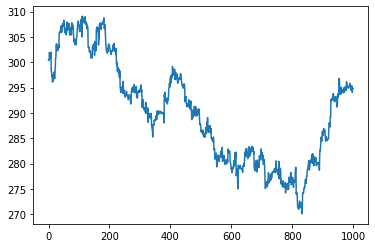

In [115]:
# Setting up random data for testing
x = (np.random.rand(1000)*np.random.randn(1000) + 0.5)*np.diff(np.random.randn(1001))
series = np.cumsum(x)
series += 300
plt.plot(series)

# 1. Local Optima

Using the following link, read the source code and documentation for the function **find_peaks** in the **scipy** libary's **signal** module. The function will find the set of local maxima by assessing the points **whose direct neighbors have a smaller amplitude**. 

The documentation can be found here: [Find Peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

Use the function to find the peaks of our data and then plot the peaks over the data. Following this, find a way to obtain the local minima using the same function (stackoverflow is a good resource for support). Fill this into a lambda function called **find_troughs**.

Notice that this function has constant parameters, vary the parameters and see the effects they have on the peaks and troughs.

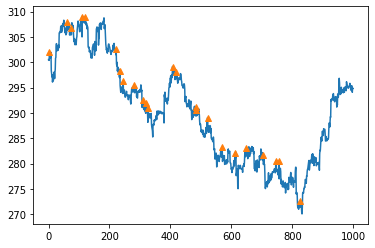

In [116]:
#Find the peaks of the dummy data
peaks, _ = find_peaks(series, threshold = 1)

#Plot the dummy data and its peaks
plt.plot(series)
plt.plot(peaks,series[peaks], '^')



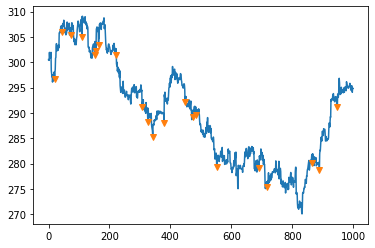

In [117]:
#Find the troughs of the dummy data
find_troughs = lambda x: find_peaks(-x, threshold = 1)
troughs, _ = find_troughs(series)

#Plot the dummy data and its troughs
plt.plot(series)
plt.plot(troughs,series[troughs], 'v')



# 2. Regression

In this section you will write  functions: regress_optima, regress_from_optimum, and regress_mid which will take your data and your optima indicies as inputs. Write a [**docstring**](https://www.datacamp.com/community/tutorials/docstrings-python) for each of the functions and make use of the [**LinearRegression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression) function from the **sklearn** library's **linear_model** module.

Docstrings are an important part of code cleanliness and readability. Please take the time to learn proper conventions.

## regress_optima

This function is meant to perform a linear regression on a certain amount of peaks/troughs. The function returns the slope and intercept of this regression and takes the lookback arguement (lb) to identify how many of the most recent optima to regress upon. In other words, we perform regression on the lb-th most recent peaks or troughs.

In [6]:
def regress_optima(data: np.ndarray, optima: np.ndarray, lb: int) -> (int, int):
    """
    Write your docstring here.
    """
    
    return m, b 

In [ ]:
#call regress_optima on both the peaks array and troughs array


#plot the series with its peaks and troughs and their regression lines, add a legend as well




## regress_from_optimum

This function is meant to choose the most recent optimum and perform a linear regression on the pieces following this optimum. It does not need to specify a lookback because it simply regresses from the last optimum (peak or trough). It also returns the slope and intercept of this regression.

In [5]:
def regress_from_optimum(data: np.ndarray, optima: np.ndarray) -> (int, int):
    """
    Write your docstring here.
    """
    
    return m, b

In [22]:
#call regress_from_optimum on both the peaks array and troughs array


#plot a 'recent' portion of the series (i.e. last n data points) and regression lines from the last peak and trough




## regress_mid

This function is meant to generate the regression lines of both your peaks and troughs up to a certain lookback. Afterwards, it will compute the line which symmetrically splits the two lines (the mid line) and return the slope and intercept of this line.

In [4]:
def regress_mid(data: np.ndarray, peaks: np.ndarray, troughs: np.ndarray, lb:int) -> (int, int):
    """
    Write your docstring here.
    """
    
    return m, b

In [3]:
#Call regress_mid on both the peaks array and troughs array


#Plot the series with its peaks and troughs as well as your generated mid line




# 3. Trading Logic

Now using your three functions, complete **bullish** which returns a boolean on whether you are currently long or short given the data (True for long and False for short). This will simply be a set of conditionals which asses the returned m, b from your above functions and return True or False based on the conditions you've implemented.

In [ ]:
def bullish() -> bool:
    
    
    
    
    
    
    
    
    return 

# 4. Port to QuantConnect (Recommended)

With all of the above complete, move your functions into a QuantConnect script and adapt it to the structure of the class they provide. 

If you have not already, make an account using your Queen's email on [QuantConnect](https://www.quantconnect.com/signup), head over to the [Algorithm Lab](https://www.quantconnect.com/terminal/) and create a new algorithm.

Start writing you algorithm by pulling in daily data from the SPX ticker and apply your functions to the data. Use the backtesting feature to assess your algorithms performance and make any modifcations you see fit.

## What's wrong this approach to an algorithm?
- In the most common implemenation, this approach is either holding 100% of SPX or not holding anything. Typically you want to diversify investments across multiple stocks/indices.
- The averaging of the last peak and trough slope is not an accurate way of determining the trend of the data, because taking the average has no predictive power (should be looking at more than just the peaks/troughs)
- There are many stock patterns under technical analysis. We are assuming the data reverts back to the mean (which financial time series almost never do).